# COMP5318/COMP4318 Week 3: Linear and Logistic Regression

# **Recap**

## **Linear Regression**

### **Regression vs Classification**

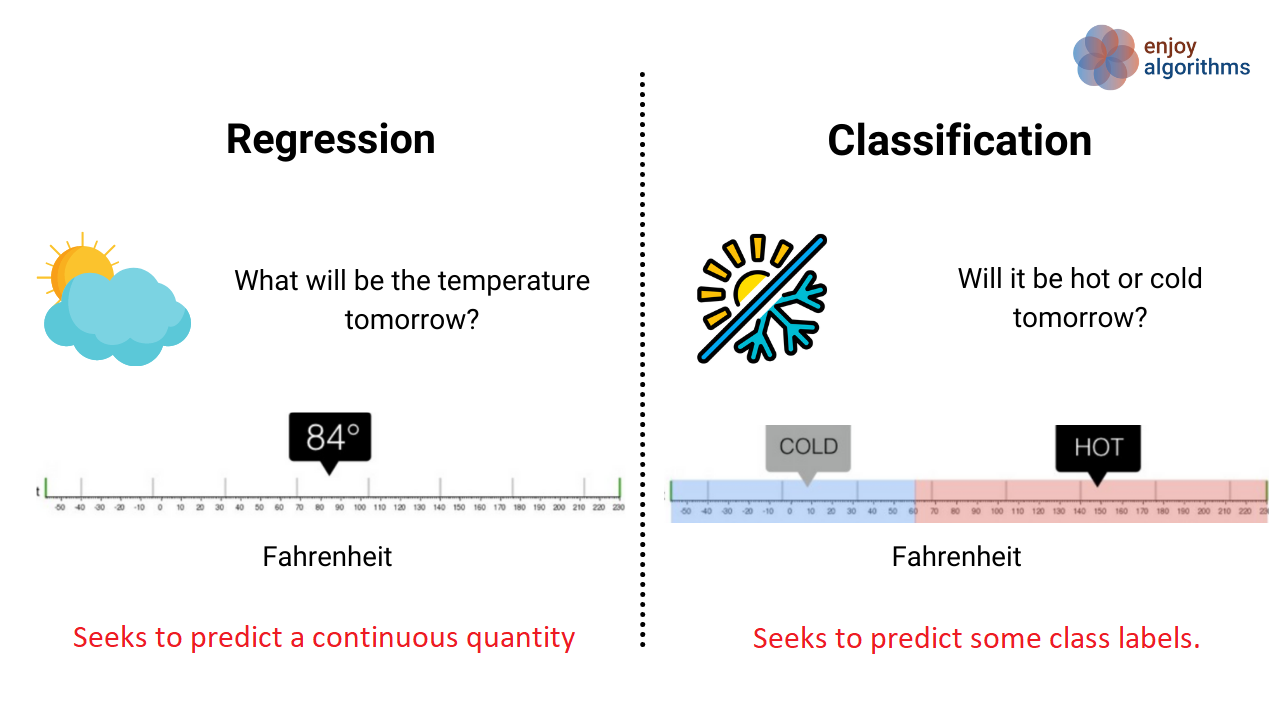

### **Linear Regression**

#### Predict the value of a variable based on the value of another variable.

<img src="https://miro.medium.com/v2/1*GBjasHYN0y3cKO-edveV4w.png" width="800">

#### **Evaluate an Linear Regression model**

<img src="https://blog.kakaocdn.net/dn/dTPP9B/btrTAMUSLX2/EgXfQd9g2wZ3PVuLC4P9i0/img.png" width="600">

### **R-Squared: how well the data fit the regression model**

$$R^2 = \frac{SSR}{SST}  = 1 - \frac{SSE}{SST} $$

<img src="https://miro.medium.com/max/1400/0*ShyeOD5V5Ln5YTXH" width="800">

### **Linear Regression: Pros and Cons**

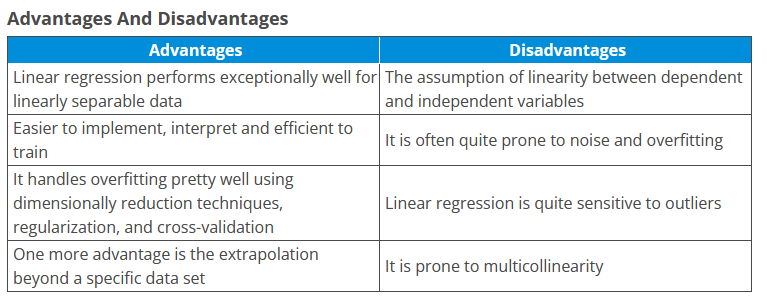

## **Ridge and Lasso Regression**

### **Underfitting and Overfitting**

**Bias Error**: the difference between what the model predicts and the real, expected values.

**Variance**: the variability of model prediction for a given data point.

<img src="https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_13.jpg" width="800">

$\rightarrow$ **Model with high bias** pays very little attention to the training data and oversimplifies the model.

$\rightarrow$ **Model with high variance** pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.

### **Ridge Regression**: A L2 Regularization Method to reduce Overfitting.

#### $$\frac{1}{n}\sum_{i=1}^n(\hat{y}_i-y_i)^2 + \alpha\sum_{i=1}^mw_i^2$$

<img src="https://media.licdn.com/dms/image/D5622AQEiS5fQieqOmA/feedshare-shrink_2048_1536/0/1706780315484?e=2147483647&v=beta&t=N3vlu6pbKFRfuhJgoL8X4qMMYcua4iX87oRNBFcMT_A" width="800">

### **Lasso Regression** (L1 Regularization)

#### $$\frac{1}{n}\sum_{i=1}^n(\hat{y}_i-y_i)^2 + \alpha\sum_{i=1}^m|w_i|$$

<img src="https://www.andreaperlato.com/img/lassoregression.png" width="600">

### Linear vs Ridge vs Lasso

Ridge Coefficients

<img src="https://bradleyboehmke.github.io/HOML/06-regularized-regression_files/figure-html/ridge-coef-example-1.png" width="500">

Lasso Coefficients

<img src="https://bradleyboehmke.github.io/HOML/06-regularized-regression_files/figure-html/lasso-coef-example-1.png" width="500">

**Ridge regression** shrinks the coefficients *asynmtotically close to zero*, while **Lasso regression** shrinks the coefficients all the way to zero.

When increase the value of Lambda,

$\rightarrow$ In Ridge, the most important parameters might shrink a little bit and the less important parameter stay at high value.

$\rightarrow$ In Lasso, the most important parameters shrink a little bit and the less important parameters goes closed to zero.

## **Logistic Regression**

#### A supervised learning algorithm that makes use of **logistic (sigmoid)  functions** to predict the probability of a binary outcome.


<img src="https://media5.datahacker.rs/2021/01/83.jpg" width="600">

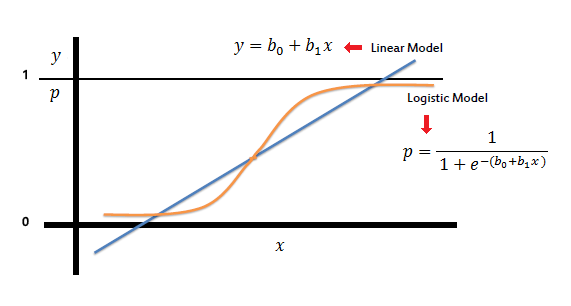

#### **Logistic Regression vs Linear Regression**

<img src="https://www.statology.org/wp-content/uploads/2021/08/linear_vs_logistic1-1.png" width="800">

# Implementation

## 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import signal
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

## 2. Introduction

Linear models for regression and classification are widely used in practice and have been extensively studied in statistics and machine learning. In this tutorial we will show how to implement in Python four algorithms:
- for regression tasks: the strandard linear regression and its two variations: Ridge and Lasso
- for classification tasks: logistic regression.

We start with regression tasks. We will first generate a simple dataset caled <b>Waves</b> to illustrate how the standard linear regression works.

Text(0, 0.5, 'Target')

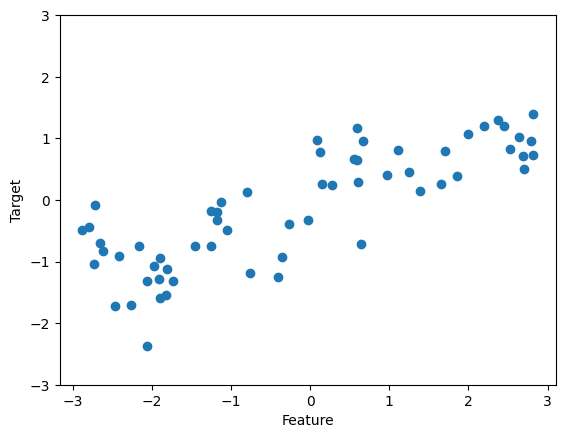

In [2]:
# Create the wave datset - a simple dataset that we will use to illustrate regression
# It has a single input feature and a numeric target variable
def make_wave(n_samples):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X,y = make_wave(60)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

## 3. Linear regression (standard version)

This is the classical linear regression version. It finds the parameters <b>w</b> and <b>b</b> that minimize the sum of squared errors between the predicted and target values for the training set examples:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:",lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The parameters of the linear regression are lr.coef_and lr.intercept_, corresponding to <b>w</b> and <b>b</b> respectively.

lr.coef_ is a NumPy array with one entry per feature; in our case it is a single number as we have one input feature.

lr.intercept_ is always a single number.

Let's test the performance of the linear regression model on both the training and test sets. When using a linear regression model, the method <b>score</b> will calculate the coefficient of determination R^2:

In [4]:
print("Training set R^2 score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(lr.score(X_test, y_test)))

Training set R^2 score: 0.67
Test set R^2 score: 0.66


We can see that the two R^2 values are very similar, so there is no overfitting.

Now let's take a look at how linear regression performs on a more complex real dataset. We will use the <b>California Housing dataset</b> which is available from <b>sklearn</b> ([Documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)). The task is to predict the median value of homes in different Californian districts, based on attributes such as median income, median house age, average number of rooms per household, and latitude/longitude coordinates of the area. It contains 20640 examples, described with 8 numerical features, and the target variable is also numeric.

In [5]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
print("Data shape:", cali.data.shape)

Data shape: (20640, 8)


In [6]:
print("Keys of California Housing dataset:\n", cali.keys())

Keys of California Housing dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [7]:
print("Feature names:", cali['feature_names'])
print("Data:", cali['data'][:5])

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Data: [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [8]:
X = cali.data
y = cali.target

In [9]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set R^2 score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(lr.score(X_test, y_test)))

Training set R^2 score: 0.61
Test set R^2 score: 0.59


**Again for this dataset note that the training and test set scores are similar, indicating there is little overfitting occuring, even without regularisation.**

To demonstrate the effect and importance of regularisation, we will use a modified version of this dataset with some extra features. This <b>Extended California Housing</b> dataset includes the original 8 features and also 36 additional features which are derived from the original features, so 44 features in total.

In [10]:
#generating the Extended California Housing Dataset
def load_extended_cali():
    cali = fetch_california_housing()
    X = cali.data
    X = MinMaxScaler().fit_transform(cali.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, cali.target

In [11]:
X,y = load_extended_cali()
print("X.shape:", X.shape)

X.shape: (20640, 44)


### Discussion Question
Examine the documentation of PolynomialFeatures: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

What do you expect will happen with all these extra features? With more features per example, will the model perform better on this dataset than the original?




#### PolynomialFeatures

<img src="https://aaronnotes.com/data-science-notes/c07-data-analysis-with-python/res/poly-reg4.png" width="500">

#### Let's build a linear regression model as before and test it on the training and test sets:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.69
Test set score: -0.73


Note that the R^2 for the training set is better than for the original dataset, but the test score is very bad. **In fact it is negative, and means the model, which was fitted on the training set, is doing worse than predicting the average y value when applied to the test set.**

With all these extra features, some serious overfitting is happening here! See the sklearn documentation for the implementation of R^2 [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score). It is only possible for a linear regression model to have a negative R^2 when it is applied to different data than it was fitted for.

In the standard linear regression we can't control the model complexity to avoid overfitting. But there are other linear regresion versions where we can do this, e.g. Ridge regression and Lasso regression. The main idea is to <i>regularise</i> the model by adding restrictions, e.g. to constrain the values of the coefficients <b>w</b>. <i>Regularisation</i> means explicitely restricting a model to avoid overfitting.

## 4. Ridge (L2) regression

In Ridge regression there are additional restrictions on the coefficients <b>w</b> - their values should be as small as possible (close to 0), in addition to predicting well on the training data. A more restricted model is less likely to overfit. The particular kind of regularisation used in Ridge regression is called L2 regularisation, as the penalty term added to the cost is the L2 norm.

$$\frac{1}{n}\sum_{i=1}^n(\hat{y}_i-y_i)^2 + \alpha\sum_{i=1}^mw_i^2$$

Let's run Ridge regression on the Extended California Housing dataset:

In [15]:
#Building the Ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) #alpha = 1 by default

#Evaluating it on the training and test set
print("Training set R^2 score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set R^2 score: 0.63
Test set R^2 score: 0.61


Compared to the standard linear regression on this dataset, the training set score is lower but the test set score is higher. The two scores are now closer, so there is less evidence for overfitting. This is consistent with our expectation that a more constrained model is likely to reduce overfiting.

We can control the trade-off between model simplicity (near-zero coefficients) and training set performance using the parameter <b>alpha</b>. In the example above, we used the default value: <b>alpha</b>=1.

Increasing <b>alpha</b> increases the weight of the L2 penalty term, and hence makes the coefficients smaller (closer to 0). This typically decreases the performance on the training set but may improve the performance on the test set (i.e. improve generalization, this is what we are interested in):


In [16]:
#alpha=10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


On the other hand, decreasing <b>alpha</b> means less restricted coefficients. For very small values of <b>alpha</b>, Ridge regression will behave similarly to the standard linear regression:

In [17]:
#alpha=0.001
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.66
Test set score: 0.50


The optimal value of <b>alpha</b> depends on the dataset and is determined by experimenting with different values. We will study methods to do this later in this course.

## 5. Lasso (L1) regression

Lasso is an alternative version of linear regression which uses regularisation. As in Ridge regression, Lasso also restricts the coefficients to be close to 0, but in a different way, using so called L1 regularisation.

$$\frac{1}{n}\sum_{i=1}^n(\hat{y}_i-y_i)^2 + \alpha\sum_{i=1}^m|w_i|$$

To simplify, there is no longer an issue with keeping some weights very large and others very small (like there was with the L2 norm), as long as the overall magnitude of the weights is kept small.

The result is that some coefficients will become exactly 0. This means that their corresponding features will be ignored by the regression model and can be seen as a form of feature selection. The advantage of using less features is that the model is simpler, easier to interpret and shows the most important features.

Running Lasso on the Extended California Housing dataset:

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


### Discussion Question
What do we call it when both the training and test scores are very low? If no features are being used, what is the model predicting for each input? Why would this be the best way to minimise the cost on the training examples?

### Answer

Our aggressive regularisation has caused our model to underfit, as the R^2 scores are low on both the training and test sets!

In fact, we can see that no features are being used (all the w are zero), and the model is simply predicting the same y value (the bias) regardless of the input. This is because the regularisation term is too heavily weighted, and it is possible to minimise the cost more by having the weights all zero than to decrease the prediction error.

### Task
It seems the default values for Lasso are not appropriate. As in Ridge regression, Lasso also has a regularization parameter <b>alpha</b> that controls how strongly the coefficients are pushed towards 0. By default it is set to 1.

The syntax for setting **alpha** is similar to as for Ridge regression above. Your task is to fix the issue with the default Lasso regularisation. Make a new linear regression model with Lasso and adjust alpha to improve the performance on the test set.

Since alpha=1 was too high, try alpha values 0.01, 0.001, 0.0001, and 0.00001.

Explain the trends in training and test set performance, as well as the number of features used. Which of these models would you pick and why?

### Solution

In [19]:
# alpha=0.01
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.56
Test set score: 0.53
Number of features used: 4


In [20]:
# alpha=0.001
lasso0001 = Lasso(alpha=0.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso0001.coef_ != 0))

Training set score: 0.61
Test set score: 0.58
Number of features used: 10


In [21]:
# alpha=0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.64
Test set score: 0.62
Number of features used: 19


In [ ]:
# alpha=0.00001
lasso000001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso000001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso000001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso000001.coef_ != 0))

With Lasso regression and **alpha** of 0.0001, we are able to exceed the test set score performance of Ridge regression, while only using 19 features instead of all 44. This is an advantage as the model is easier to interpret and we can also see which are the most important features.

As **alpha** becomes too small, the effect of regularisation is removed and Lasso performs similarly to the standard linear regression, showing overfitting for our dataset.

Once again note that this is not the cleanest way to write this code, and we will learn different methods to search over parameters in later weeks.

## 6. Logistic regression

Logistic regression is used for classification tasks. Despite its name, logistic regression is a classification algorithm and should not be confused with linear regression.

We will demonstrate how to apply LogisticRegression from sklearn to the <b>Breast Cancer Wisconsin dataset</b>. Let's first look at the data:

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Keys of breast cancer dataset:\n", cancer.keys())
print("Target names:", cancer['target_names'])
print("Feature names:", cancer['feature_names'])

Keys of breast cancer dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Target names: ['malignant' 'benign']
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The documentation can be found [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset). There are 569 examples, with 30 features describing characteristics of cell nuclei from a biopsy of a breast mass. From this information, the goal is to predict whether a mass in malignant (cancer) or benign.

Now let's apply logistic regression ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)):

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.953
Accuracy on test set: 0.958


### Task

Similarly to Ridge and Lasso regression, LogisticRegression has a regularization parameter - it is <b>C</b> not <b>alpha</b> - which controls the trade-off between fitting the training data and finding coefficients <b>w</b> close to 0. High values of <b>C</b> put more emphasis on fitting the training data and low values put more emphasis on finding <b>w</b> close to 0, which typically decreases the performance on the training set but may result in better generalization (note this is the opposite of the way **alpha** was adjusted for the regularised linear regression models).

In the code above we used the default value of <b>C</b>=1 and it worked well. You can experiment with different values of <b>C</b> and observe the result.

### Solution
Here is one example using the regularisation parameter **C**=10.

In [ ]:
logreg = LogisticRegression(solver='liblinear', C=10)
logreg.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.965


## Summary

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

## Acknowledgements

This tutorial is based on:

Andreas C. Mueller and Sarah Guido (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists, O'Reilly.